# Dvocas 3

In [21]:
# Import potrebnih biblioteka
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


### Učitvanje seta podataka

In [4]:
# Load dataset
df = pd.read_csv('./data/boston.csv')

### Pregled seta podataka


In [9]:
# Prikaži prvih nekoliko redova
print("Prvih nekoliko redova:")
display(df.head())

# Proveri osnovne informacije i tipove podataka
print("Info o kolonama:")
df.info()

# Proveri deskriptivnu statistiku
print("Osnovna statistika:")
display(df.describe())

Prvih nekoliko redova:


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Info o kolonama:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
Osnovna statistika:


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Kreiranje i prikaz korelacione matrice

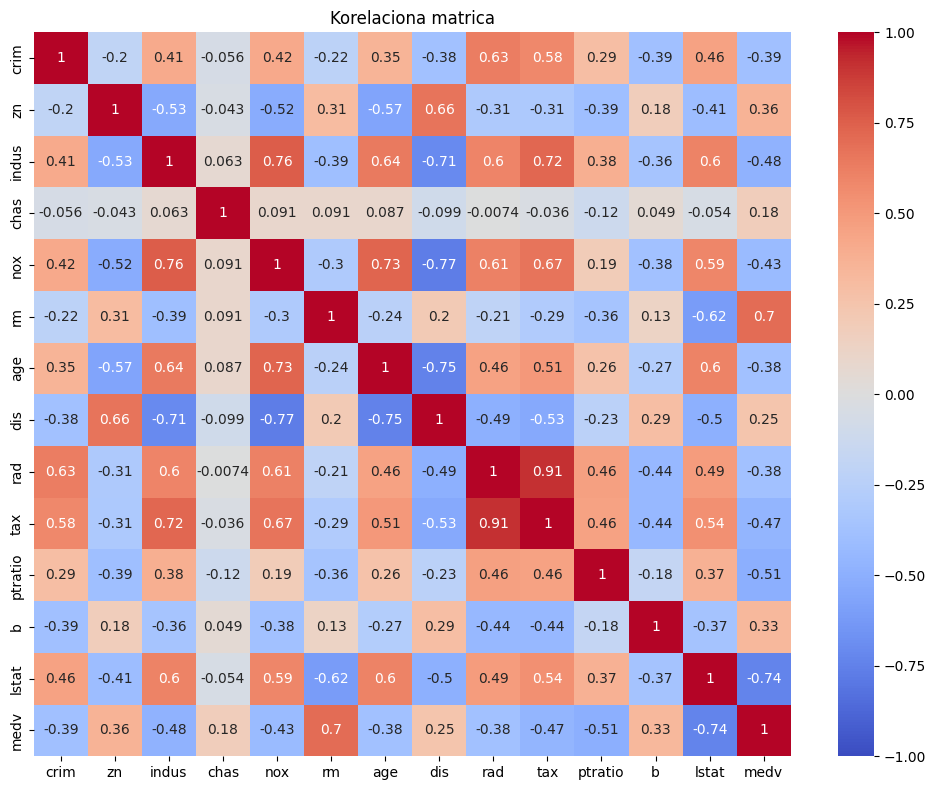

In [22]:
# Kreiraj korelacionu matricu
corr_matrix = df.corr(numeric_only=True).round(2)

plt.figure(figsize=(10, 8))
sb.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Korelaciona matrica")
plt.tight_layout()
plt.show()

### Jednostavna linearna regresija: Predikcija `medv` na osnovu `lstat`

In [31]:
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

# Podela podataka: 80% train, 20% test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Treniranje modela na trening skupu
model_sm = smf.ols(formula='medv ~ lstat', data=train_df).fit()



                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     476.3
Date:                Tue, 10 Jun 2025   Prob (F-statistic):           3.20e-70
Time:                        02:31:56   Log-Likelihood:                -1317.2
No. Observations:                 404   AIC:                             2638.
Df Residuals:                     402   BIC:                             2646.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.8369      0.635     54.860      0.0

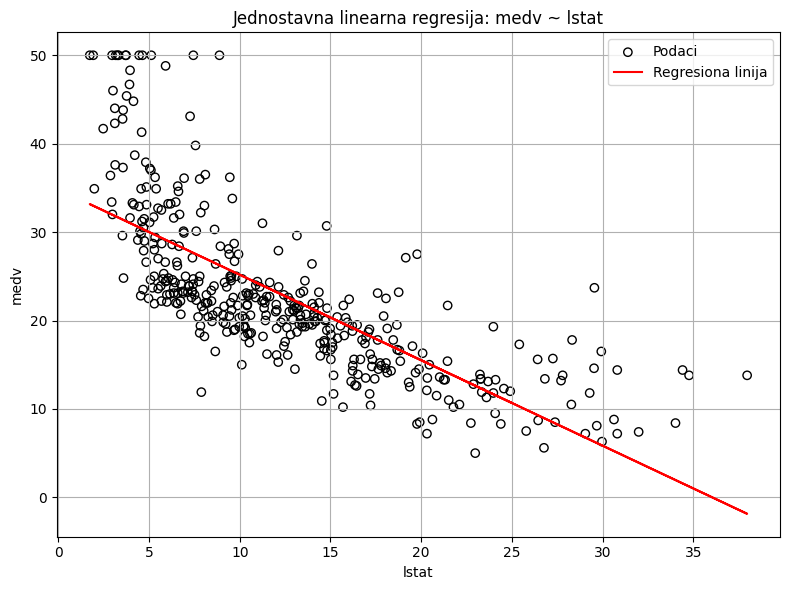

In [34]:
### Analiza modela jednostavne linearne regresije ###

# Prikaz sažetka modela (ekvivalent `summary(lm1)` iz R-a)
print(model_sm.summary())

# Prikaz svih atributa modela (kao `names(lm1)`)
print("Atributi modela:")
print(dir(model_sm))

# Prikaz koeficijenata (kao `lm1$coefficients` i `coef(lm1)`)
print("Koeficijenti:")
print(model_sm.params)

# Izračunavanje RSS (Residual Sum of Squares)
rss = sum(model_sm.resid ** 2)
print(f"Residual Sum of Squares (RSS): {rss:.2f}")

# Konfidencioni intervali za koeficijente (ekvivalent `confint(lm1)`)
print("95% Konfidencioni intervali:")
print(model_sm.conf_int(alpha=0.05))

# Prikaz podataka i regresione linije
plt.figure(figsize=(8, 6))
plt.scatter(train_df['lstat'], train_df['medv'], edgecolor='black', facecolor='none', label='Podaci')
plt.plot(train_df['lstat'], model_sm.fittedvalues, color='red', label='Regresiona linija')
plt.xlabel("lstat")
plt.ylabel("medv")
plt.title("Jednostavna linearna regresija: medv ~ lstat")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



### Pravljenje predikcija i prikaz rezultata

In [35]:
# Napravi predikcije za test skup
test_df['predicted_medv'] = model_sm.predict(test_df)

# Prikaz prvih 10 redova sa stvarnim i predikovanim vrednostima
print("Prvih 10 predikcija (test skup):")
print(test_df[['lstat', 'medv', 'predicted_medv']].head(10))


Prvih 10 predikcija (test skup):
     lstat  medv  predicted_medv
173   9.04  23.6       26.099510
274   3.53  32.4       31.425096
491  18.07  13.6       17.371736
72    5.52  22.8       29.501699
452  17.27  16.1       18.144961
76   11.97  20.0       23.267575
316  18.33  17.8       17.120438
140  24.16  14.0       11.485563
471  12.87  19.6       22.397697
500  14.33  16.8       20.986562


### Diganostički grafikoni

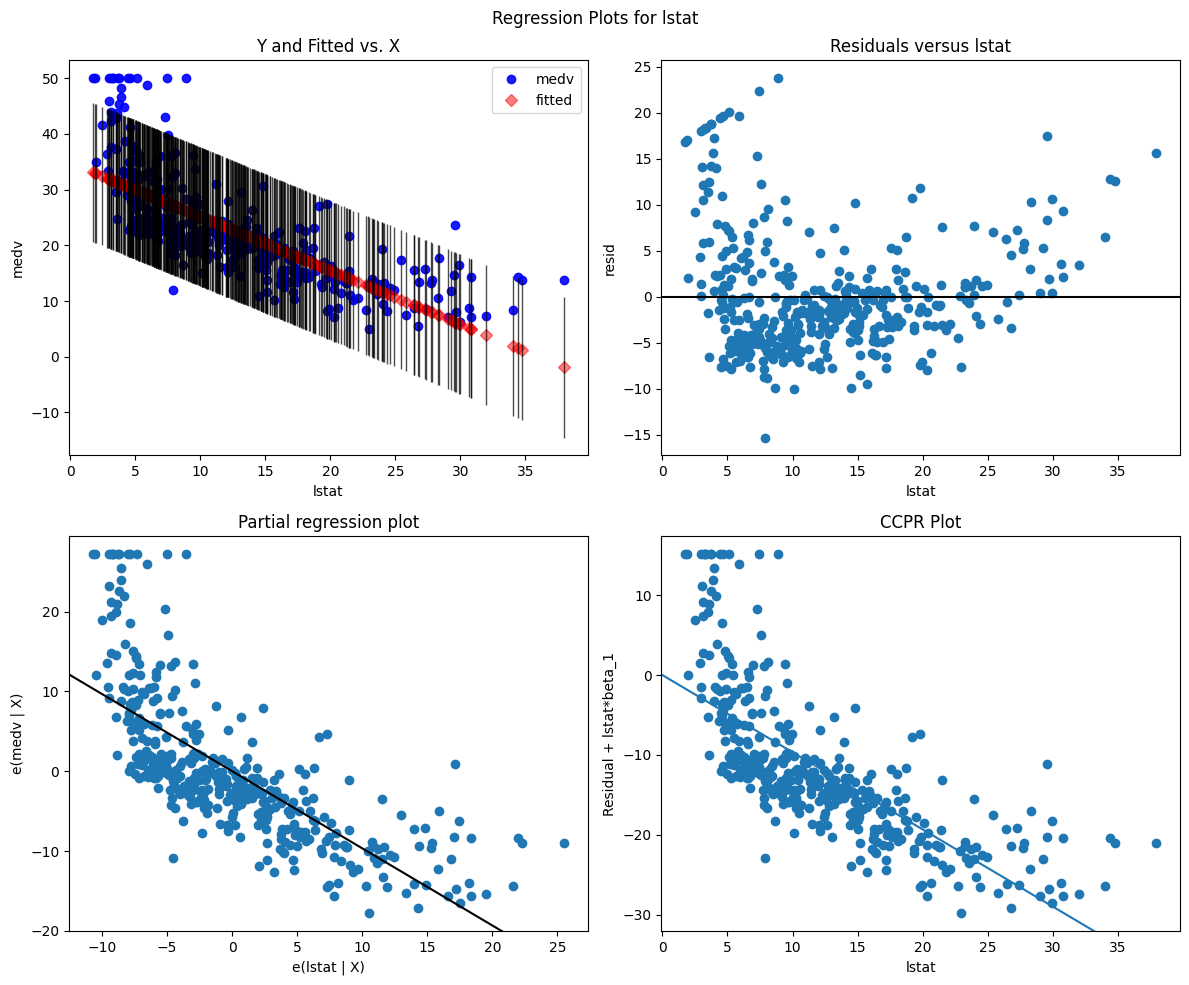

In [37]:
import statsmodels.api as sm

# Podešavanje rasporeda subplotova (2x2)
fig = plt.figure(figsize=(12, 10))
fig = sm.graphics.plot_regress_exog(model_sm, 'lstat', fig=fig)
plt.tight_layout()
plt.show()

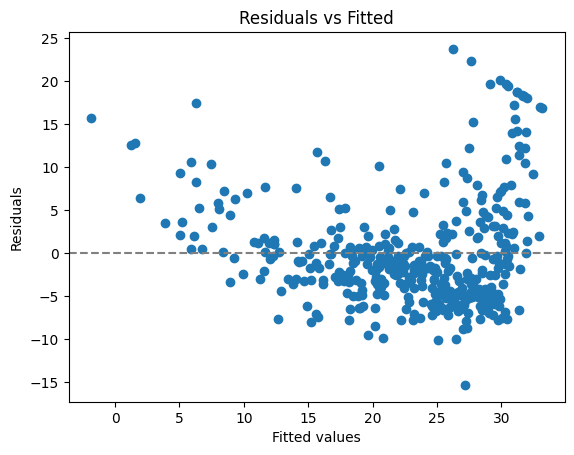

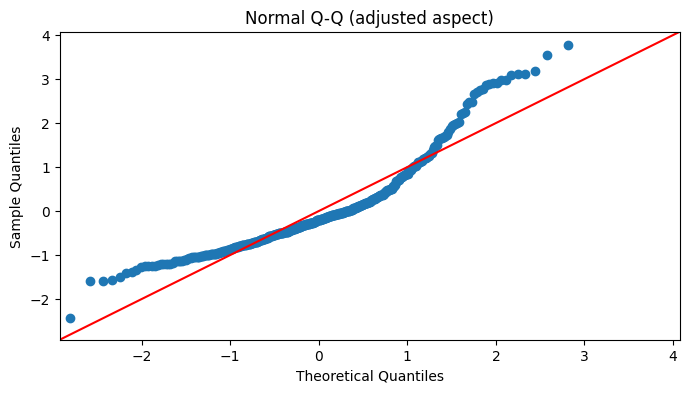

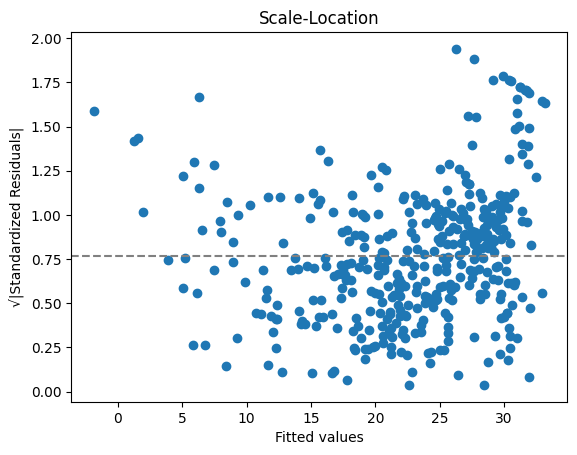

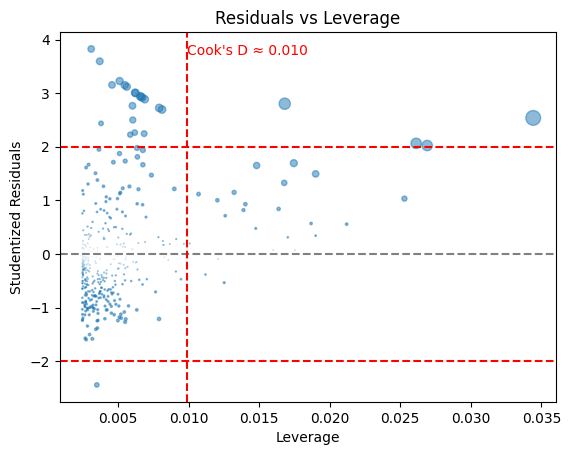

In [62]:
# Residuals vs Fitted
plt.scatter(model_sm.fittedvalues, model_sm.resid)
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

# Normal Q-Q (širi graf da linija deluje blaže)
sm.qqplot(model_sm.resid, line='45', fit=True)
plt.gcf().set_size_inches(8, 4)
plt.title("Normal Q-Q (adjusted aspect)")
plt.show()

# Scale-Location
influence = model_sm.get_influence()
std_resid = influence.resid_studentized_internal
abs_sqrt_resid = np.sqrt(np.abs(std_resid))

plt.scatter(model_sm.fittedvalues, abs_sqrt_resid)
plt.axhline(np.mean(abs_sqrt_resid), color='gray', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("√|Standardized Residuals|")
plt.title("Scale-Location")
plt.show()

# Residuals vs Leverage + Cook's D threshold
leverage = influence.hat_matrix_diag
stud_resid = influence.resid_studentized_external
cooks_d = influence.cooks_distance[0]
n = len(model_sm.model.endog)
thresh = 4 / n

plt.scatter(leverage, stud_resid, s=1000 * cooks_d, alpha=0.5)
plt.axhline(0, color='gray', linestyle='--')
plt.axhline(2, color='red', linestyle='--')
plt.axhline(-2, color='red', linestyle='--')
plt.axvline(thresh, color='red', linestyle='--')
plt.text(thresh, plt.ylim()[1]*0.9, f"Cook's D ≈ {thresh:.3f}", color='red')
plt.xlabel("Leverage")
plt.ylabel("Studentized Residuals")
plt.title("Residuals vs Leverage")
plt.show()


In [ ]:
## Objašnjenja

# Prvi grafikon, Reziduali u odnosu na predviđene vrednosti, koristi se za proveru da li je pretpostavka o linearnoj vezi ispunjena (Pretpostavka 1). Obrazac može da se pojavi na ovom grafikonu ukoliko postoji nelinearna veza između zavisne i nezavisne promenljive. Ako su reziduali jednako raspoređeni oko horizontalne linije bez jasnog obrasca, to ukazuje da nema nelinearnih veza. U tom slučaju, grafikon potvrđuje linearnu vezu između prediktora i ciljne promenljive.

# Drugi grafikon, Normalni Q-Q dijagram, govori nam da li su reziduali normalno distribuirani (Pretpostavka 2). Reziduali bi trebalo da leže duž isprekidane dijagonalne linije. U ovom slučaju, primećujemo značajno odstupanje od dijagonale, a samim tim i od normalne distribucije.

# Treći grafikon, Scale-Location, koristi se za proveru pretpostavke o jednakosti varijanse reziduala, tj. homoskedastičnosti (Pretpostavka 3). Poželjno je da tačke deluju kao da su nasumično raspoređene iznad i ispod horizontalne linije. U ovom slučaju, varijansa reziduala izgleda da se menja, pa pretpostavka nije ispunjena.

# Četvrti grafikon, Reziduali u odnosu na Leverage, koristi se za identifikaciju postojanja uticajnih tačaka (Pretpostavka 4). Njihovo prisustvo može ozbiljno da utiče na procenu regresionih koeficijenata. Tipično se pojavljuju u uglovima grafa, tj. izvan isprekidane linije koja predstavlja Cook’s distance. U ovom slučaju, postoji više takvih posmatranja.
